# Mapa do resultado do 2º Turno das Eleições Presidencias de 2018 por Município - DASK

In [2]:
# Importando as bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
#import dask
import dask.dataframe as dd

In [44]:
# Caminho para o arquivo Shapefile 
caminho_shapefile = r'D:\Usuários\Downloads\br_municipios\BRMUE250GC_SIR.shp'

# Ler o Shapefile
df_mapa = gpd.read_file(caminho_shapefile)

# Exibir as primeiras linhas
df_mapa.head()


,NM_MUNICIP,CD_GEOCMU,geometry
0,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.3199 -1.7557..."
1,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034..."
2,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.1423 -18.29672, -51.14236 -18.29..."
3,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.2327, -51.69957 -16.23..."
4,CURUÁ,1502855,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731..."


In [45]:
# Verificando tamanho e colunas
df_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  5572 non-null   object  
 1   CD_GEOCMU   5572 non-null   object  
 2   geometry    5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


<Axes: >

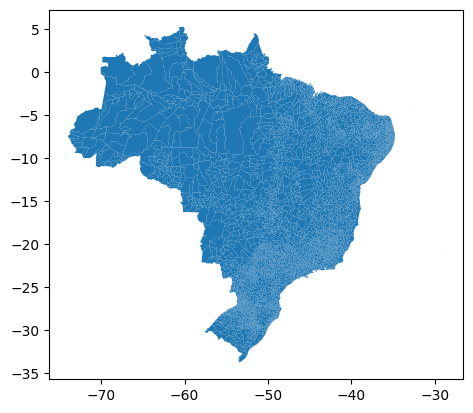

In [46]:
# Vamos exibir o mapa (plotar o shapefile)
df_mapa.plot()

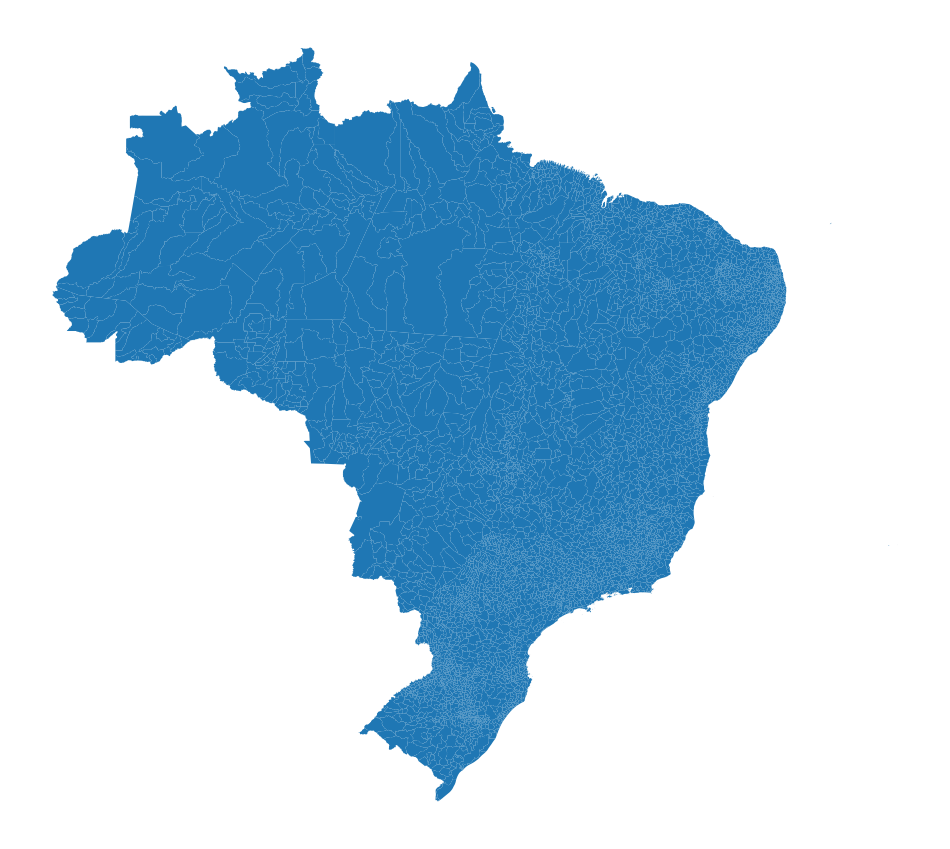

In [47]:
# Vamos expandir o espaço para desenhar o mapa
fig, ax = plt.subplots(1, figsize=(12,12))

# desenhar o mapa
df_mapa.plot(ax=ax)

# tirar os eixos
ax.set_axis_off()

plt.show()

In [ ]:
# Vamos carregar o arquivo com o resultado da eleição no Brasil dividido por municipio/zona via DASK
# Configuração do Dask
#dask.config.set({'dataframe.query-planning': True})

ddf = dd.read_csv("D:\\Usuários\\Downloads\\votacao_candidato_munzona_2018_BRASIL.csv", 
                  delimiter=';', 
                  header=0,
                  encoding='latin1', 
                  dtype={'CD_MUNICIPIO': 'int', 'SG_UF': 'str','NM_MUNICIPIO': 'str','NR_CANDIDATO': 'int','NM_URNA_CANDIDATO': 'str','QT_VOTOS_NOMINAIS': 'int','NR_TURNO': 'int'},
                  usecols=['CD_MUNICIPIO', 'SG_UF', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS', 'NR_TURNO'])

In [4]:
ddf.head()

,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
0,1,SP,71072,SÃO PAULO,7777,PAULINHO DA FORÇA,67
1,1,SP,66397,LIMEIRA,7777,PAULINHO DA FORÇA,15
2,1,SP,71072,SÃO PAULO,7777,PAULINHO DA FORÇA,215
3,1,SP,61018,ADAMANTINA,7777,PAULINHO DA FORÇA,12
4,1,SP,69752,RINCÃO,7777,PAULINHO DA FORÇA,6


In [5]:
ddf.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 7 entries, NR_TURNO to QT_VOTOS_NOMINAIS
dtypes: int64(4), string(3)

In [6]:
ddf.describe(include='all').compute()

,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
count,8.680108e+06,8680108,8.680108e+06,8680108,8.680108e+06,8680108,8.680108e+06
mean,1.002215e+00,NaN,5.717015e+04,NaN,2.418818e+04,NaN,8.302794e+01
std,4.701598e-02,NaN,2.226042e+04,NaN,2.405758e+04,NaN,1.141213e+03
min,1.000000e+00,NaN,1.900000e+01,NaN,1.100000e+01,NaN,0.000000e+00
25%,1.000000e+00,NaN,5.219100e+04,NaN,5.474000e+03,NaN,0.000000e+00
50%,1.000000e+00,NaN,6.633800e+04,NaN,2.200100e+04,NaN,0.000000e+00
75%,1.000000e+00,NaN,8.667300e+04,NaN,6.505000e+04,NaN,7.000000e+00
max,2.000000e+00,NaN,9.943000e+04,NaN,9.099900e+04,NaN,1.206820e+05
unique,NaN,28,NaN,5425,NaN,24242,NaN
top,NaN,SP,NaN,SÃO PAULO,NaN,FERNANDO HADDAD,NaN


c:\Users\User\j dados\mapa_eleicoes_2018_v2\.venv\Lib\site-packages\dask\dataframe\core.py:382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 1 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
c:\Users\User\j dados\mapa_eleicoes_2018_v2\.venv\Lib\site-packages\dask\dataframe\core.py:382: UserWarning: Insufficient elements for `head`. 3 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
c:\Users\User\j dados\mapa_eleicoes_2018_v2\.venv\Lib\site-packages\dask\dataframe\core.py:382: UserWarning: Insufficient elements for `head`. 3 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
c:\Users\User\j dados\mapa_eleicoes_2018_v2\.venv\Lib\site-packages\dask\dataframe\core.py:382: UserWarning: Insufficient elements for `head`. 3 elements requested, only 1 elements available. Try passing larger `npartitions` to `head`.
  war

In [9]:
print(ddf.head().dtypes)

NR_TURNO                       int64
SG_UF                string[pyarrow]
CD_MUNICIPIO                   int64
NM_MUNICIPIO         string[pyarrow]
NR_CANDIDATO                   int64
NM_URNA_CANDIDATO    string[pyarrow]
QT_VOTOS_NOMINAIS              int64
dtype: object


In [12]:
#Criando índices
ddf_urna = ddf.set_index('NR_TURNO')
print(ddf_urna.head())


         SG_UF  CD_MUNICIPIO     NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
NR_TURNO                                                                        
1           MA          7820    LAGOA DO MATO         19789   NILTON CARNEIRO   
1           MA          9539  VITORINO FREIRE         19789   NILTON CARNEIRO   
1           MA          9350         TIMBIRAS         19789   NILTON CARNEIRO   
1           MA          7900   MARAJÁ DO SENA         19789   NILTON CARNEIRO   
1           MA          7412           BURITI         19789   NILTON CARNEIRO   

          QT_VOTOS_NOMINAIS  
NR_TURNO                     
1                         0  
1                         0  
1                         0  
1                         0  
1                         0  


In [17]:
filtrado = ddf.loc[2]
print(filtrado.head())

   NR_TURNO SG_UF  CD_MUNICIPIO NM_MUNICIPIO  NR_CANDIDATO  NM_URNA_CANDIDATO  \
2         1    SP         71072    SÃO PAULO          7777  PAULINHO DA FORÇA   

   QT_VOTOS_NOMINAIS  
2                215  


In [18]:
print(ddf['NM_MUNICIPIO'].compute())


0                    SÃO PAULO
1                      LIMEIRA
2                    SÃO PAULO
3                   ADAMANTINA
4                       RINCÃO
                  ...         
139872         CORONEL PACHECO
139873    CONCEIÇÃO DE IPANEMA
139874                  ESTIVA
139875             TRÊS PONTAS
139876            MÁRIO CAMPOS
Name: NM_MUNICIPIO, Length: 8680108, dtype: string


In [24]:
# Separar os dados pois precisamos apenas dos dados de 2 Turno
df_votacao_sep = ddf.loc[2]
#df_votacao.sample(3).T #solução com pandas.
print(df_votacao_sep.head(3))


   NR_TURNO SG_UF  CD_MUNICIPIO NM_MUNICIPIO  NR_CANDIDATO  NM_URNA_CANDIDATO  \
2         1    SP         71072    SÃO PAULO          7777  PAULINHO DA FORÇA   

   QT_VOTOS_NOMINAIS  
2                215  


In [26]:
# Vamos verificar quantos municipios unicos existem no conjunto de dados
# Vamos pegar por codigo do municipio
ddf['CD_MUNICIPIO'].nunique().compute()

np.int64(5708)

In [27]:
# Mas o Brasil tem 5570 municipios
# Vamos verificar algumas cidades fora do Brasil
#df_votacao[df_votacao['SG_UF'] == 'ZZ'].sample(4).T  ##solução com pandas
ddf[ddf['SG_UF'] == 'ZZ'].compute()

,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
45317,1,ZZ,29319,ARTIGAS,12,CIRO GOMES,23
45914,1,ZZ,29459,BUDAPESTE,12,CIRO GOMES,31
45927,1,ZZ,30309,PEDRO JUAN CABALLERO,12,CIRO GOMES,6
45928,1,ZZ,30392,QUITO,12,CIRO GOMES,46
46211,1,ZZ,29793,HONG KONG-HONG,12,CIRO GOMES,32
...,...,...,...,...,...,...,...
11766,1,ZZ,30279,PARAMARIBO,19,ALVARO DIAS,12
12343,1,ZZ,29289,AMÃ,19,ALVARO DIAS,6
12958,1,ZZ,30066,MADRI,19,ALVARO DIAS,59
12963,1,ZZ,29599,COPENHAGUE-DINA,19,ALVARO DIAS,5


In [29]:
# Quantas cidades fora do Brasil estão no conjunto de dados?
ddf[ddf['SG_UF'] == 'ZZ']['CD_MUNICIPIO'].nunique().compute()

np.int64(138)

In [30]:
# Vamos eliminar os municipios de fora do Brasil
df_votacao = ddf[ddf['SG_UF'] != 'ZZ'].compute()

In [ ]:
# Verificando a quantidade de municipios --> Agora sim temos 5.570 municípios.
df_votacao['CD_MUNICIPIO'].nunique()

5570

In [33]:
# Os dados estão separados por municipio/zona
# Municipios pequenos normalmente tem apenas 1 zona eleitoral
# mas municipios maiores podem ter várias zonas eleitorias

# Vamos verificar Belo Horizonte
df_votacao[df_votacao['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
90017,1,MG,41238,BELO HORIZONTE,4307,GUSTAVO RIANI,30
90026,1,MG,41238,BELO HORIZONTE,4307,GUSTAVO RIANI,36
90039,1,MG,41238,BELO HORIZONTE,4307,GUSTAVO RIANI,103
90307,1,MG,41238,BELO HORIZONTE,4307,GUSTAVO RIANI,58
90313,1,MG,41238,BELO HORIZONTE,4307,GUSTAVO RIANI,37
...,...,...,...,...,...,...,...
89795,1,MG,41238,BELO HORIZONTE,540,CORONEL LACERDA,546
89797,1,MG,41238,BELO HORIZONTE,540,CORONEL LACERDA,1091
89800,1,MG,41238,BELO HORIZONTE,540,CORONEL LACERDA,1003
89801,1,MG,41238,BELO HORIZONTE,540,CORONEL LACERDA,1552


In [34]:
# Eliminar algumas colunas do dataframe que não serão utilizadas
df_votacao = df_votacao[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO',
                        'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]

df_votacao.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
0,SP,71072,SÃO PAULO,7777,PAULINHO DA FORÇA,67
1,SP,66397,LIMEIRA,7777,PAULINHO DA FORÇA,15
2,SP,71072,SÃO PAULO,7777,PAULINHO DA FORÇA,215
3,SP,61018,ADAMANTINA,7777,PAULINHO DA FORÇA,12
4,SP,69752,RINCÃO,7777,PAULINHO DA FORÇA,6


In [35]:
# Precisamos agregar os dados por municipio e candidato
df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum()

QT_VOTOS_NOMINAIS
SG_UF CD_MUNICIPIO NM_MUNICIPIO NR_CANDIDATO NM_URNA_CANDIDATO                      
AC    1007         BUJARI       11           GLADSON CAMELI                     4024
                                12           CIRO GOMES                          301
                                13           FERNANDO HADDAD                    2408
                                             MARCUS ALEXANDRE                   1990
                                15           HENRIQUE MEIRELLES                  131
...                                                                              ...
TO    96997        BARROLÂNDIA  90000        EDUARDO MAIA                          2
                                90090        PROFESSOR JUNIOR GEO                 15
                                90111        PASTOR HUEDER NOLETO                  1
                                90123        EDINHO                                0
                                90690        RONIVON MACIEL                        0

[7563055 rows x 1 columns]

In [36]:
# Fazer o groupby, reindexar o indice, vai salvar isso em um dataframe
df_votacao = df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum().reset_index()

df_votacao.sample(4)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
926598,GO,94935,NOVA AURORA,27555,GLAUCIANE VALVERDE,0
5447010,SP,61492,APARECIDA,31660,HELENA GOMES,0
1088904,MA,8320,SÃO JOÃO DO PARAÍSO,33888,ORLEANS CARVALHO,0
2557064,MG,50750,QUELUZITO,1520,MAÍRA DOS SANTOS CARLOS,0


In [37]:
# Vamos verificar novamente a cidade de Belo Horizonte
df_votacao[df_votacao['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
1406662,MG,41238,BELO HORIZONTE,12,CIRO GOMES,248144
1406663,MG,41238,BELO HORIZONTE,13,FERNANDO HADDAD,680320
1406664,MG,41238,BELO HORIZONTE,13,FERNANDO PIMENTEL,206299
1406665,MG,41238,BELO HORIZONTE,15,ADALCLEVER LOPES,47760
1406666,MG,41238,BELO HORIZONTE,15,HENRIQUE MEIRELLES,18663
...,...,...,...,...,...,...
1408772,MG,41238,BELO HORIZONTE,90909,PROFESSOR GLEWTON,41
1408773,MG,41238,BELO HORIZONTE,90911,DENISE ANDRADE,269
1408774,MG,41238,BELO HORIZONTE,90913,XANDÃO,172
1408775,MG,41238,BELO HORIZONTE,90919,WILSON C GIRAFA,1


In [38]:
# Ordenar o dataframe pela quantidade de votos e depois deixar apenas o primeiro
# registro de cada municipio
df_votacao.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
7275712,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,6530764
7275721,SP,71072,SÃO PAULO,40,MARCIO FRANÇA,4622208
4311983,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,4110553
7275723,SP,71072,SÃO PAULO,45,JOÃO DORIA,3908145
7275706,SP,71072,SÃO PAULO,13,FERNANDO HADDAD,3677287
4311987,RJ,60011,RIO DE JANEIRO,20,WILSON WITZEL,2706694
4311988,RJ,60011,RIO DE JANEIRO,25,EDUARDO PAES,2357061
7275735,SP,71072,SÃO PAULO,177,MAJOR OLIMPIO,2022057
686710,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2016905
7275742,SP,71072,SÃO PAULO,457,MARA GABRILLI,1816702


In [39]:
# Vamos ordenar
df_votacao.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)

# dropar as linhas duplicadas, mantendo a primeira
df_votacao.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)

df_votacao.head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
7275712,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,6530764
4311983,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,4110553
686710,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2016905
1406669,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,1688811
447162,BA,38490,SALVADOR,13,FERNANDO HADDAD,1632969
3704662,PR,75353,CURITIBA,17,JAIR BOLSONARO,1435373
72424,AM,2550,MANAUS,17,JAIR BOLSONARO,1307177
597585,CE,13897,FORTALEZA,17,JAIR BOLSONARO,1058261
874784,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,990936
3415052,PE,25313,RECIFE,17,JAIR BOLSONARO,820659


In [40]:
# Vamos verificar novamente a cidade de Belo Horizonte
df_votacao[df_votacao['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
1406669,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,1688811


In [41]:
# Agora vamos criar uma coluna representando o resultado da eleição naquele municipio
# sendo que o Resultado é True se o candidato Bolsonaro venceu naquele municipio
# e False em caso contrário
df_votacao['RESULTADO'] = df_votacao['NR_CANDIDATO'].apply(lambda x: x == 17)

In [42]:
# Verificando o resultado
df_votacao.head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
7275712,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,6530764,True
4311983,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,4110553,True
686710,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2016905,True
1406669,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,1688811,True
447162,BA,38490,SALVADOR,13,FERNANDO HADDAD,1632969,False
3704662,PR,75353,CURITIBA,17,JAIR BOLSONARO,1435373,True
72424,AM,2550,MANAUS,17,JAIR BOLSONARO,1307177,True
597585,CE,13897,FORTALEZA,17,JAIR BOLSONARO,1058261,True
874784,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,990936,True
3415052,PE,25313,RECIFE,17,JAIR BOLSONARO,820659,True


In [43]:
# Mostrando alguns valores do dataframe do geopandas
df_mapa.sample(3)

NameError: name 'df_mapa' is not defined

In [ ]:
# tentando encontrar o municipio pelo código
df_votacao[df_votacao['CD_MUNICIPIO'] == 3156700]

In [ ]:
# Porque não podemos usar o nome do municipio para juntar
df_votacao[df_votacao['NM_MUNICIPIO'] == 'OURO BRANCO']

In [ ]:
# Recuperar a tabela de correspondencia entre IBGE e TSE
# direto do github do Estadão
link = 'https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv'

df_equivalencia = pd.read_csv(link)

df_equivalencia.head()

In [ ]:
# Vamos preparar os dataframes

In [ ]:
# Vamos reindexar o dataframe de votação pelo código do TSE
df_vot_novo = df_votacao.copy()

df_vot_novo.set_index('CD_MUNICIPIO', drop=False, inplace=True)

df_vot_novo.head()

In [ ]:
# Vamos reindexar o dataframe de Equivalencia pelo Código do TSE
df_equi_novo = df_equivalencia.copy()

df_equi_novo.set_index('COD_TSE', drop=False, inplace=True)

df_equi_novo.head()

In [ ]:
# Verificando o tamanho dos dataframes
df_vot_novo.info()

In [ ]:
df_equi_novo.info()

In [ ]:
# Criando um novo dataframe com base no merge de Votação e Equivalencia
df_vot_equi = df_vot_novo.join(df_equi_novo)

df_vot_equi.head()

In [ ]:
# Vamos juntar o dataframe do GeoPandas com o dataframe Votação/Equivalência

In [ ]:
df_vot_equi.info()

In [ ]:
df_mapa.info()

In [ ]:
# Transformar a coluna de codigo de IBGE do dataframe de Votação/Equivalência
df_vot_equi['GEOCOD_IBGE'] = df_vot_equi['GEOCOD_IBGE'].astype(str)

df_vot_equi.info()

In [ ]:
df_mapa.head()

In [ ]:
# Vamos unificar os indices

# Mudando o indice do dataframe de Mapa
df_mapa.set_index('CD_GEOCMU', drop=False, inplace=True)

In [ ]:
# Mudando o indice do dataframe de Votação/Equivalência
df_vot_equi.set_index('GEOCOD_IBGE', drop=False, inplace=True)

In [ ]:
# Vamos juntar os dataframes
df_mapa_novo = df_mapa.join(df_vot_equi)

df_mapa_novo.head().T

In [ ]:
# Verificando o tamanho do mapa novo
df_mapa_novo.info()

In [ ]:
# Vamos descobrir os 2 municipios a mais no mapa
df_mapa_novo[df_mapa_novo['NR_CANDIDATO'].isnull()]

In [ ]:
# Matar a coluna ajuste
df_mapa_novo.drop(columns=['AJUSTE'], inplace=True)

In [ ]:
# Vamos eliminar a informação das duas lagoas do RS
df_mapa_novo.dropna(inplace=True)

In [ ]:
df_mapa_novo.info()

In [ ]:
# Vamos desenhar o mapa

# Criar a referência para o código de cor (False/0 = red, True/1 = green)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])

# Desenhando o mapa
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = df_mapa_novo.plot(column='RESULTADO', cmap=cmap, legend=True, linewidth=0.1, ax=ax,
                      edgecolor='grey')

# Escondendo o eixos
ax.set_axis_off()

# Colocando um título
ax.set_title('Resultado Eleição 2018 por Município / 2º Turno', fontdict={'fontsize': '25', 'fontweight': '3'})

# Criando uma nota do rodapé
ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',
    xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
    verticalalignment='top', fontsize=10, color='#555555')

# Alterando a legenda
leg = ax.get_legend()
leg.get_texts()[0].set_text('Fernando Haddad')
leg.get_texts()[1].set_text('Jair Bolsonaro')

plt.show()